In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
print(train_data.shape)
train_data.head(10)

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_data[train_data.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [8]:
train_data[train_data['Age'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,8835_01,Earth,True,G/1425/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Shalle Bartines,False
8301,8862_03,Europa,True,C/329/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Alchib Myling,True
8374,8956_04,Earth,False,G/1453/P,TRAPPIST-1e,NaN,False,194.0,1.0,10.0,629.0,0.0,Krisa Bonnondry,False
8407,8988_01,Earth,True,G/1448/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Maen Fowlesterez,True


In [9]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

<BarContainer object of 3 artists>

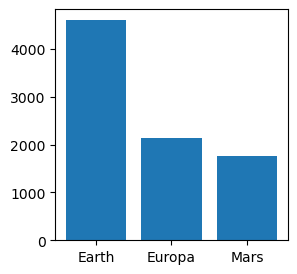

In [10]:
plt.figure(figsize=(3,3))
# fig, ax = plt.subplots(figsize=(3,4))
plt.bar(train_data['HomePlanet'].value_counts().index, train_data['HomePlanet'].value_counts().values)

<AxesSubplot:xlabel='Destination', ylabel='Count'>

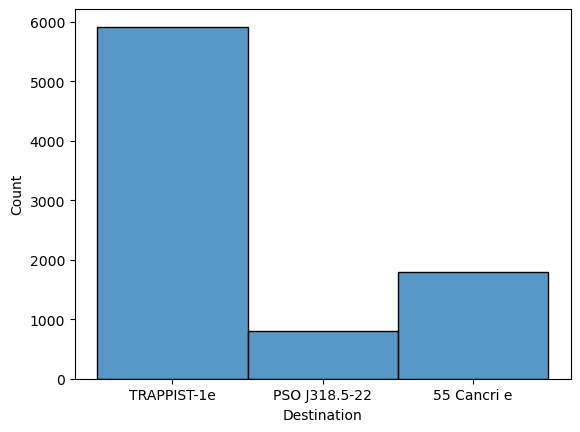

In [11]:
# sns.set_style(rc=)
sns.histplot(data=train_data, x='Destination')
# plt.show()

In [12]:
le = LabelEncoder()
train_data['HomePlanetCode'] = le.fit_transform(train_data['HomePlanet'])
train_data['DestinationCode'] = le.fit_transform(train_data['Destination'])
test_data['HomePlanetCode'] = le.fit_transform(test_data['HomePlanet'])
test_data['DestinationCode'] = le.fit_transform(test_data['Destination'])

In [13]:
train_data['HomePlanetCode'].value_counts()

0    4602
1    2131
2    1759
3     201
Name: HomePlanetCode, dtype: int64

In [14]:
train_data['DestinationCode'].value_counts()

2    5915
0    1800
1     796
3     182
Name: DestinationCode, dtype: int64

In [15]:
train_data[train_data['HomePlanet'].isna()].loc[:,['HomePlanet','Destination','Transported']]

,HomePlanet,Destination,Transported
59,NaN,TRAPPIST-1e,True
113,NaN,TRAPPIST-1e,False
186,NaN,55 Cancri e,True
225,NaN,TRAPPIST-1e,False
234,NaN,55 Cancri e,True
...,...,...,...
8515,NaN,TRAPPIST-1e,False
8613,NaN,55 Cancri e,False
8666,NaN,55 Cancri e,True
8674,NaN,TRAPPIST-1e,False


In [16]:
train_data[train_data['Destination'].isna()].loc[:,['HomePlanet','Destination','Transported']]

,HomePlanet,Destination,Transported
47,Mars,NaN,True
128,Earth,NaN,False
139,Earth,NaN,False
347,NaN,NaN,False
430,Earth,NaN,False
...,...,...,...
8372,Earth,NaN,True
8551,Mars,NaN,True
8616,Mars,NaN,True
8621,Europa,NaN,False


In [17]:
train_data['CryoSleepCode'] = le.fit_transform(train_data['CryoSleep'])
test_data['CryoSleepCode'] = le.fit_transform(test_data['CryoSleep'])

In [18]:
test_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanetCode,DestinationCode,CryoSleepCode
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,2,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,2,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,2,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,2,0
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks,0,2,0
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle,1,0,1
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,1,2,1
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,1,0,1
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson,0,0,0


In [19]:
train_data[['CabinDeck','CabinNum','CabinSide']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['CabinDeck','CabinNum','CabinSide']] = test_data['Cabin'].str.split('/', expand=True)

In [20]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,2,0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,2,0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,2,0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,2,0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,2,0,F,1,S


In [21]:
train_data[train_data.CabinDeck.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,0,2,0,NaN,NaN,NaN
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,2,2,1,NaN,NaN,NaN
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False,1,2,0,NaN,NaN,NaN
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,2,2,0,NaN,NaN,NaN
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True,2,2,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,False,1,0,0,NaN,NaN,NaN
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,False,1,0,0,NaN,NaN,NaN
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,True,1,0,1,NaN,NaN,NaN
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False,0,2,1,NaN,NaN,NaN


In [22]:
train_data['CabinDeck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

In [23]:
train_data['CabinDeckCode'] = le.fit_transform(train_data['CabinDeck'])
test_data['CabinDeckCode'] = le.fit_transform(test_data['CabinDeck'])
train_data['CabinDeckCode'].value_counts()

5    2794
6    2559
4     876
1     779
2     747
3     478
0     256
8     199
7       5
Name: CabinDeckCode, dtype: int64

In [24]:
train_data['CabinSideCode'] = le.fit_transform(train_data['CabinSide'])
test_data['CabinSideCode'] = le.fit_transform(test_data['CabinSide'])
train_data['CabinSideCode'].value_counts()

1    4288
0    4206
2     199
Name: CabinSideCode, dtype: int64

In [25]:
train_data['TransportedCode'] = le.fit_transform(train_data['Transported'])
train_data.head()
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide,CabinDeckCode,CabinSideCode
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,0.0,Nelly Carsoning,0,2,1,G,3,S,6,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,0.0,Lerome Peckers,0,2,0,F,4,S,5,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,0.0,Sabih Unhearfus,1,0,1,C,0,S,2,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,585.0,Meratz Caltilter,1,2,0,C,1,S,2,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,0.0,Brence Harperez,0,2,0,F,5,S,5,1


In [26]:
train_data['VIPCode'] = le.fit_transform(train_data['VIP'])
test_data['VIPCode'] = le.fit_transform(test_data['VIP'])
train_data['VIPCode'].value_counts()

0    8291
2     203
1     199
Name: VIPCode, dtype: int64

In [27]:
train_data.Age.fillna(train_data.Age.mean(), inplace=True)
test_data.Age.fillna(test_data.Age.mean(), inplace=True)
train_data.Age.isna().sum()
test_data.Age.isna().sum()

0

<AxesSubplot:>

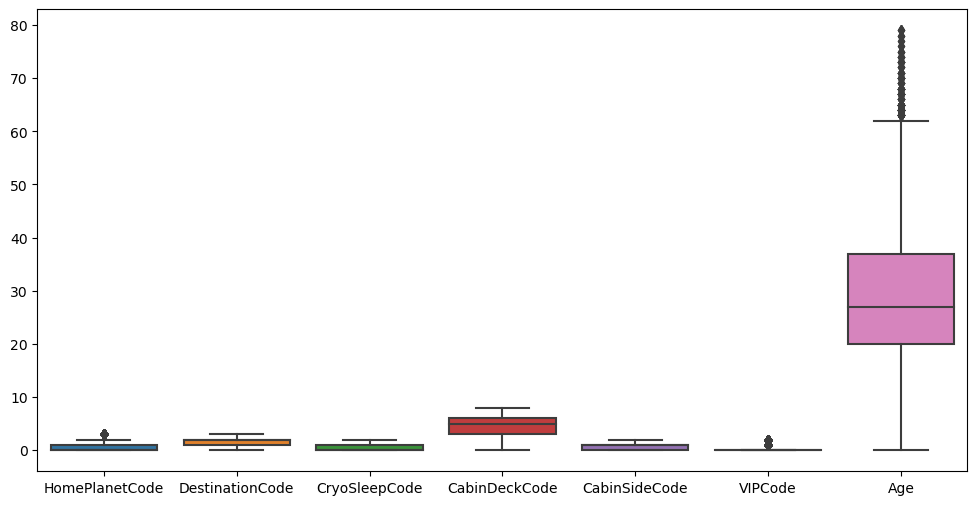

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data[['HomePlanetCode','DestinationCode','CryoSleepCode','CabinDeckCode','CabinSideCode','VIPCode','Age']])

<AxesSubplot:>

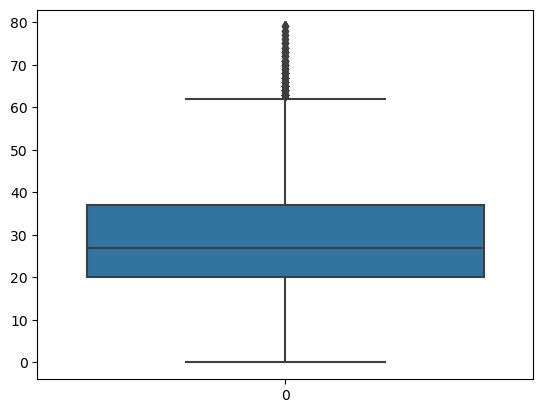

In [29]:
sns.boxplot(data=train_data['Age'])

In [30]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [31]:
train_data[['PassengerGroup','PassengerNum']] = train_data['PassengerId'].str.split('_', expand = True)
test_data[['PassengerGroup','PassengerNum']] = test_data['PassengerId'].str.split('_', expand = True)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CryoSleepCode,CabinDeck,CabinNum,CabinSide,CabinDeckCode,CabinSideCode,TransportedCode,VIPCode,PassengerGroup,PassengerNum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0,B,0,P,1,0,0,0,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0,F,0,S,5,1,1,0,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0,A,0,S,0,1,0,1,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0,A,0,S,0,1,0,0,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0,F,1,S,5,1,1,0,0004,01


In [32]:
train_data.PassengerGroup.isnull().sum()

0

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8492 non-null   object 
 2   CryoSleep        8476 non-null   object 
 3   Cabin            8494 non-null   object 
 4   Destination      8511 non-null   object 
 5   Age              8693 non-null   float64
 6   VIP              8490 non-null   object 
 7   RoomService      8512 non-null   float64
 8   FoodCourt        8510 non-null   float64
 9   ShoppingMall     8485 non-null   float64
 10  Spa              8510 non-null   float64
 11  VRDeck           8505 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   bool   
 14  HomePlanetCode   8693 non-null   int64  
 15  DestinationCode  8693 non-null   int64  
 16  CryoSleepCode    8693 non-null   int64  
 17  CabinDeck     

In [34]:
features = ['HomePlanetCode','DestinationCode','CryoSleepCode','CabinDeckCode','CabinSideCode','VIPCode','Age','PassengerGroup','PassengerNum']

X = train_data[features]
y = train_data['TransportedCode']

X_test = test_data[features]

In [35]:
X_test.head()

,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeckCode,CabinSideCode,VIPCode,Age,PassengerGroup,PassengerNum
0,0,2,1,6,1,0,27.0,0013,01
1,0,2,0,5,1,0,19.0,0018,01
2,1,0,1,2,1,0,31.0,0019,01
3,1,2,0,2,1,0,38.0,0021,01
4,0,2,0,5,1,0,20.0,0023,01


In [36]:
X.shape

(8693, 9)

In [37]:
y.shape

(8693,)

In [38]:
y.isna().sum()

0

In [39]:
y.value_counts()

1    4378
0    4315
Name: TransportedCode, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [41]:
X_train.columns

Index(['HomePlanetCode', 'DestinationCode', 'CryoSleepCode', 'CabinDeckCode',
       'CabinSideCode', 'VIPCode', 'Age', 'PassengerGroup', 'PassengerNum'],
      dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()

X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_valid_scaled = pd.DataFrame(ss.transform(X_valid), columns = X_valid.columns)
# y_train_scaled = pd.DataFrame(ss.transform(y_train), columns = y_train.columns)
# y_valid_scaled = pd.DataFrame(ss.transform(y_valid), columns = y_valid.columns)

X_test_scaled = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

In [43]:
X_test_scaled

,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeckCode,CabinSideCode,VIPCode,Age,PassengerGroup,PassengerNum
0,-0.829953,0.580238,1.121356,0.871839,0.853121,-0.207317,-0.127921,-1.737172,-0.487948
1,-0.829953,0.580238,-0.735289,0.328531,0.853121,-0.207317,-0.687722,-1.735292,-0.487948
2,0.326196,-1.799576,1.121356,-1.301390,0.853121,-0.207317,0.151980,-1.734916,-0.487948
3,0.326196,0.580238,-0.735289,-1.301390,0.853121,-0.207317,0.641806,-1.734164,-0.487948
4,-0.829953,0.580238,-0.735289,0.328531,0.853121,-0.207317,-0.617747,-1.733411,-0.487948
...,...,...,...,...,...,...,...,...,...
4272,-0.829953,0.580238,1.121356,0.871839,0.853121,-0.207317,0.361905,1.742695,0.448879
4273,-0.829953,0.580238,-0.735289,1.958453,2.697262,-0.207317,0.921706,1.743823,-0.487948
4274,1.482344,-1.799576,1.121356,-0.758083,-0.991020,-0.207317,-0.011892,1.744575,-0.487948
4275,0.326196,1.770145,-0.735289,-0.758083,-0.991020,-0.207317,-0.011892,1.745328,-0.487948


In [44]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

pred_rf_train = model_rf.predict(X_train_scaled)
pred_rf_valid = model_rf.predict(X_valid_scaled)

print("MAE: %.4f" % metrics.mean_absolute_error(pred_rf_valid, y_valid))
print("R2 Score %.4f" % model_rf.score(X_valid_scaled, y_valid))

MAE: 0.2674
R2 Score 0.7326


In [45]:
print(metrics.classification_report(y_train, pred_rf_train))
print(metrics.classification_report(y_valid, pred_rf_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3454
           1       1.00      1.00      1.00      3500

    accuracy                           1.00      6954
   macro avg       1.00      1.00      1.00      6954
weighted avg       1.00      1.00      1.00      6954

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       861
           1       0.76      0.70      0.72       878

    accuracy                           0.73      1739
   macro avg       0.73      0.73      0.73      1739
weighted avg       0.73      0.73      0.73      1739



In [46]:
X_scaled = pd.DataFrame(ss.fit_transform(X), columns = X.columns)
X_scaled

,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeckCode,CabinSideCode,VIPCode,Age,PassengerGroup,PassengerNum
0,0.325245,0.577024,-0.741736,-1.839907,-0.993729,-0.208465,0.709437,-1.734409,-0.491161
1,-0.833031,0.577024,-0.741736,0.331095,0.849738,-0.208465,-0.336717,-1.734034,-0.491161
2,0.325245,0.577024,-0.741736,-2.382658,0.849738,2.786879,2.034566,-1.733660,-0.491161
3,0.325245,0.577024,-0.741736,-2.382658,0.849738,-0.208465,0.290975,-1.733660,0.457443
4,-0.833031,0.577024,-0.741736,0.331095,0.849738,-0.208465,-0.894666,-1.733286,-0.491161
...,...,...,...,...,...,...,...,...,...
8688,0.325245,-1.803647,-0.741736,-2.382658,-0.993729,2.786879,0.848924,1.738236,-0.491161
8689,-0.833031,-0.613311,1.115916,0.873845,0.849738,-0.208465,-0.755179,1.738984,-0.491161
8690,-0.833031,0.577024,-0.741736,0.873845,0.849738,-0.208465,-0.197230,1.739359,-0.491161
8691,0.325245,-1.803647,-0.741736,-0.211656,0.849738,-0.208465,0.221232,1.739733,-0.491161


In [47]:
model_rf.fit(X_scaled,y) 
predictions = model_rf.predict(X_test_scaled)
predictions.astype(bool)

array([ True,  True,  True, ...,  True,  True, False])

In [48]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions.astype(bool)})
output.to_csv('submission.csv', index = False)
print("Submission saved!")

Submission saved!
